# Assignment 2 - Machine Learning Pipeline

In [144]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn.metrics as metrics
import sklearn.tree as tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [145]:
# Autoreload file containing 
%load_ext autoreload
%autoreload 2
import data_processing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [146]:
df = data_processing.load_data('data/credit-data.csv', 'PersonID')

## Data Exploration

In [147]:
df.head()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,98976,0,1.000000,55,60601,0,505.000000,0.0,2,0,0,0,0.0
1,98991,0,0.547745,71,60601,0,0.459565,15666.0,7,0,2,0,0.0
2,99012,0,0.044280,51,60601,0,0.014520,4200.0,5,0,0,0,0.0
3,99023,0,0.914249,55,60601,4,0.794875,9052.0,12,0,3,0,0.0
4,99027,0,0.026599,45,60601,0,0.049966,10406.0,4,0,0,0,2.0


In [148]:
df.describe() 

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,41016.000000,41016.000000,41016.00000,41016.000000,41016.000000,41016.000000,41016.000000,3.304200e+04,41016.000000,41016.000000,41016.000000,41016.000000,39979.000000
mean,115800.154598,0.161400,6.37587,51.683489,60623.824166,0.589233,331.458137,6.578996e+03,8.403477,0.419592,1.008801,0.371587,0.773231
std,28112.723511,0.367904,221.61895,14.746880,11.984357,5.205628,1296.109695,1.344683e+04,5.207324,5.190382,1.153826,5.169641,1.121269
min,22.000000,0.000000,0.00000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106539.750000,0.000000,0.03431,41.000000,60618.000000,0.000000,0.176375,3.333000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119901.500000,0.000000,0.18973,51.000000,60625.000000,0.000000,0.369736,5.250000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134698.250000,0.000000,0.66716,62.000000,60629.000000,0.000000,0.866471,8.055750e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.00000,109.000000,60644.000000,98.000000,106885.000000,1.794060e+06,56.000000,98.000000,32.000000,98.000000,13.000000


### Commentary
According to the "Give Me Some Credit" discussion boards, values of 96, 97, and 98 mean that respondents refused to say or responded "other". For the purposes of this analysis, I will exclude records with those valuues in the Number of Times Late columns.

https://www.kaggle.com/c/GiveMeSomeCredit/discussion/867

In [149]:
# Filter out all values greater than or equal to 96 in the late payment fields
df = df[~((df['NumberOfTimes90DaysLate']>=96) | (df['NumberOfTime60-89DaysPastDueNotWorse']>=96) 
          | (df['NumberOfTime30-59DaysPastDueNotWorse']>=96))]

In [150]:
# Define continuous vs categorical variables
continuous_cols = ['RevolvingUtilizationOfUnsecuredLines','age', 
                   'DebtRatio','MonthlyIncome']

discrete_cols = ['SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse',
                    'NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate', 
                    'NumberRealEstateLoansOrLines',
                    'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


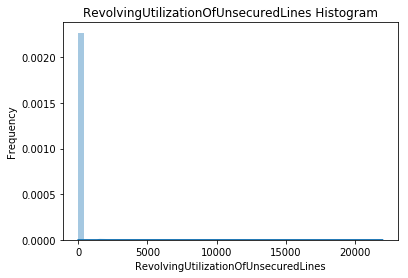

None


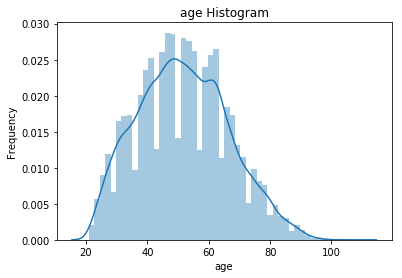

None


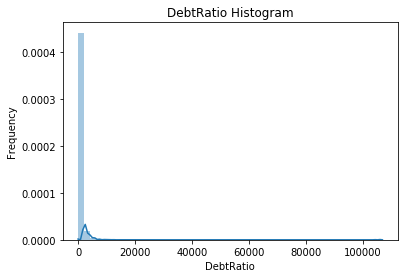

None


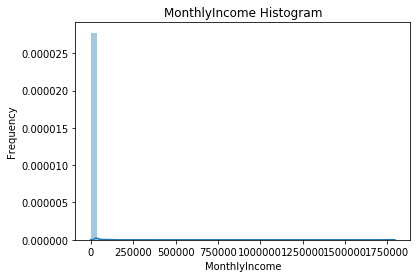

None


In [151]:
# Create histograms for continuous variables
for col in continuous_cols:
    print(data_processing.make_histogram(df, col))

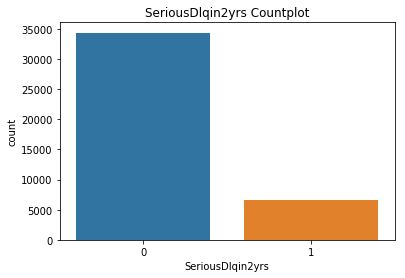

None


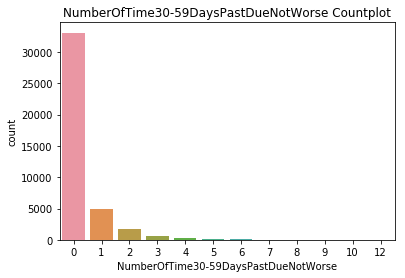

None


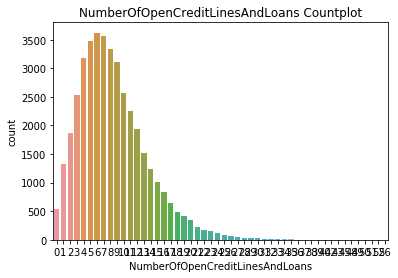

None


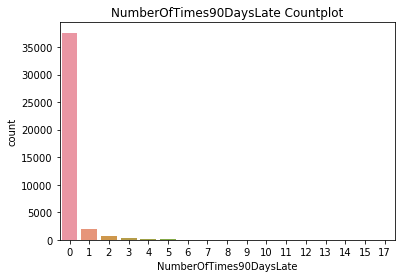

None


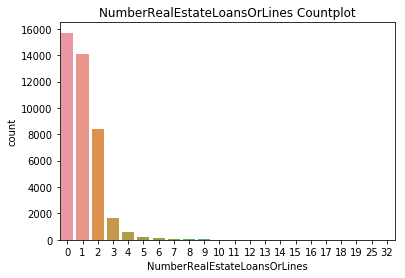

None


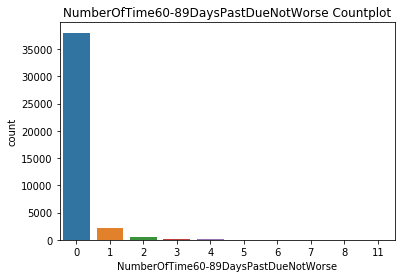

None


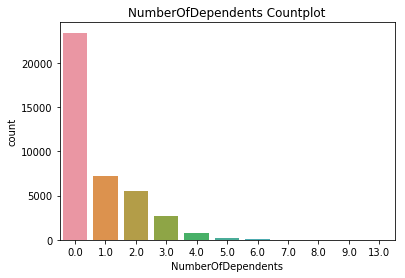

None


In [152]:
# Create countcharts for discrete variables
for col in discrete_cols:
    print(data_processing.make_countchart(df, col))

### Commentary here
The financial variables are all characterized by a cluster around 0 but an extremely long tail. Those in the long tail. Since the high values are plausible and may in fact be indicitie of liklihood of default, outlier values will be considered valuable information rather than skewing stuff.

Lots of skew in monthly income, but looks to be the 1%. 

In [153]:
# Correlation
corr = data_processing.check_correlations(df)
corr

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
PersonID,1.000000,-0.622758,0.004455,0.106861,-0.021581,-0.213398,0.006237,0.019226,0.018574,-0.220860,0.002052,-0.193127,-0.032001
SeriousDlqin2yrs,-0.622758,1.000000,-0.004490,-0.170384,-0.044811,0.346318,-0.012319,-0.031857,-0.032004,0.354461,-0.006235,0.317781,0.067891
RevolvingUtilizationOfUnsecuredLines,0.004455,-0.004490,1.000000,-0.008100,0.006015,-0.004671,0.022235,0.005820,-0.014752,-0.003328,0.004709,-0.001678,0.005322
age,0.106861,-0.170384,-0.008100,1.000000,0.005392,-0.078427,0.038173,0.047631,0.156008,-0.099460,0.046713,-0.082306,-0.212778
zipcode,-0.021581,-0.044811,0.006015,0.005392,1.000000,-0.016506,0.002092,-0.004932,-0.009244,-0.013289,0.003155,-0.016763,-0.001875
NumberOfTime30-59DaysPastDueNotWorse,-0.213398,0.346318,-0.004671,-0.078427,-0.016506,1.000000,0.008705,-0.007851,0.085194,0.235397,0.049158,0.332271,0.072264
DebtRatio,0.006237,-0.012319,0.022235,0.038173,0.002092,0.008705,1.000000,-0.023019,0.081976,-0.013956,0.177456,-0.002226,-0.070883
MonthlyIncome,0.019226,-0.031857,0.005820,0.047631,-0.004932,-0.007851,-0.023019,1.000000,0.106389,-0.027220,0.126888,-0.014421,0.060371
NumberOfOpenCreditLinesAndLoans,0.018574,-0.032004,-0.014752,0.156008,-0.009244,0.085194,0.081976,0.106389,1.000000,-0.110482,0.440916,-0.028622,0.058812
NumberOfTimes90DaysLate,-0.220860,0.354461,-0.003328,-0.099460,-0.013289,0.235397,-0.013956,-0.027220,-0.110482,1.000000,-0.071127,0.320829,0.030887


### Commentary
Number of Times 30-59 Days Past Due Not Worse, Number of Times 60-89 Days Past Due Not Worse, Number of Times 90 Days Past Due are all highly correlated with each other. Also something about  correlation with Serious Delinquicy, may adjust parameters based on this.

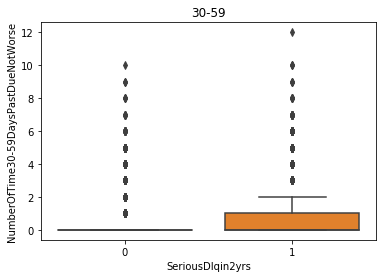

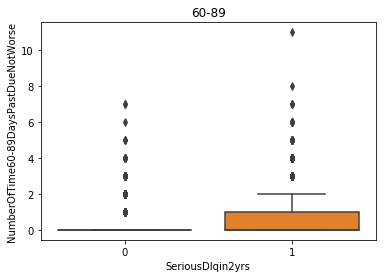

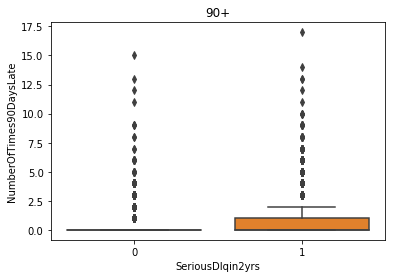

In [154]:
# Make a factorplot function, change kind of chart?
#sns.factorplot('NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse', col = 'SeriousDlqin2yrs', kind = 'box', data = df)
#sns.factorplot('NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', col = 'SeriousDlqin2yrs', data = df)
#sns.factorplot('NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfTimes90DaysLate', col = 'SeriousDlqin2yrs', data = df)
sns.boxplot('SeriousDlqin2yrs', 'NumberOfTime30-59DaysPastDueNotWorse', data = df)
plt.title('30-59')
plt.show()
sns.boxplot('SeriousDlqin2yrs', 'NumberOfTime60-89DaysPastDueNotWorse', data = df)
plt.title('60-89')
plt.show()
sns.boxplot('SeriousDlqin2yrs', 'NumberOfTimes90DaysLate', data = df)
plt.title('90+')
plt.show()

In [155]:
# By the established threshold, no other variables need to be dropped due to high correlation
high_corr_vars = data_processing.find_high_corr(corr, 0.7, 'SeriousDlqin2yrs')
high_corr_vars

Index(['SeriousDlqin2yrs'], dtype='object')

## Data Processing/Cleaning

In [156]:
# Address other null/NaN values in the data by filing with median
# Discussion of median here
model_df = data_processing.fill_nulls(df)

In [157]:
model_df.describe()

,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,40902.000000,40902.000000,40902.000000,40902.000000,40902.000000,40902.000000,40902.000000,4.090200e+04,40902.000000,40902.000000,40902.000000,40902.000000,40902.000000
mean,115874.117916,0.159528,6.390853,51.727960,60623.824067,0.317833,332.358069,6.330815e+03,8.426874,0.147719,1.011613,0.099579,0.754926
std,28024.187827,0.366172,221.927403,14.725605,11.988848,0.819617,1297.801022,1.209591e+04,5.195653,0.648396,1.154201,0.422799,1.114235
min,22.000000,0.000000,0.000000,21.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106588.250000,0.000000,0.034133,41.000000,60618.000000,0.000000,0.177775,3.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,119921.500000,0.000000,0.187554,51.000000,60625.000000,0.000000,0.370656,5.264000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,134718.250000,0.000000,0.661568,62.000000,60629.000000,0.000000,0.868662,7.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,149999.000000,1.000000,22000.000000,109.000000,60644.000000,12.000000,106885.000000,1.794060e+06,56.000000,17.000000,32.000000,11.000000,13.000000


## Generate Features/Predictors

In [158]:
# Discretize the age variable into 10 ranges variable
model_df['age_range'] = data_processing.continuous_to_cat(model_df, 'age')

In [159]:
# Make Number of Open Credit Lines a dummy variable
model_df = data_processing.cat_to_dummy(model_df, 'NumberOfOpenCreditLinesAndLoans')

In [160]:
#max_features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'zipcode', 
#                'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio','MonthlyIncome',
#                'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate', 
#                'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse', 'NumberOfDependents']

max_features = ['RevolvingUtilizationOfUnsecuredLines',
       'age', 'zipcode', 'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'MonthlyIncome', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'age_range', 'NumberOfOpenCreditLinesAndLoans_0',
       'NumberOfOpenCreditLinesAndLoans_1',
       'NumberOfOpenCreditLinesAndLoans_2',
       'NumberOfOpenCreditLinesAndLoans_3',
       'NumberOfOpenCreditLinesAndLoans_4',
       'NumberOfOpenCreditLinesAndLoans_5',
       'NumberOfOpenCreditLinesAndLoans_6',
       'NumberOfOpenCreditLinesAndLoans_7',
       'NumberOfOpenCreditLinesAndLoans_8',
       'NumberOfOpenCreditLinesAndLoans_9',
       'NumberOfOpenCreditLinesAndLoans_10',
       'NumberOfOpenCreditLinesAndLoans_11',
       'NumberOfOpenCreditLinesAndLoans_12',
       'NumberOfOpenCreditLinesAndLoans_13',
       'NumberOfOpenCreditLinesAndLoans_14',
       'NumberOfOpenCreditLinesAndLoans_15',
       'NumberOfOpenCreditLinesAndLoans_16',
       'NumberOfOpenCreditLinesAndLoans_17',
       'NumberOfOpenCreditLinesAndLoans_18',
       'NumberOfOpenCreditLinesAndLoans_19',
       'NumberOfOpenCreditLinesAndLoans_20',
       'NumberOfOpenCreditLinesAndLoans_21',
       'NumberOfOpenCreditLinesAndLoans_22',
       'NumberOfOpenCreditLinesAndLoans_23',
       'NumberOfOpenCreditLinesAndLoans_24',
       'NumberOfOpenCreditLinesAndLoans_25',
       'NumberOfOpenCreditLinesAndLoans_26',
       'NumberOfOpenCreditLinesAndLoans_27',
       'NumberOfOpenCreditLinesAndLoans_28',
       'NumberOfOpenCreditLinesAndLoans_29',
       'NumberOfOpenCreditLinesAndLoans_30',
       'NumberOfOpenCreditLinesAndLoans_31',
       'NumberOfOpenCreditLinesAndLoans_32',
       'NumberOfOpenCreditLinesAndLoans_33',
       'NumberOfOpenCreditLinesAndLoans_34',
       'NumberOfOpenCreditLinesAndLoans_35',
       'NumberOfOpenCreditLinesAndLoans_36',
       'NumberOfOpenCreditLinesAndLoans_37',
       'NumberOfOpenCreditLinesAndLoans_38',
       'NumberOfOpenCreditLinesAndLoans_39',
       'NumberOfOpenCreditLinesAndLoans_40',
       'NumberOfOpenCreditLinesAndLoans_42',
       'NumberOfOpenCreditLinesAndLoans_43',
       'NumberOfOpenCreditLinesAndLoans_45',
       'NumberOfOpenCreditLinesAndLoans_48',
       'NumberOfOpenCreditLinesAndLoans_49',
       'NumberOfOpenCreditLinesAndLoans_50',
       'NumberOfOpenCreditLinesAndLoans_51',
       'NumberOfOpenCreditLinesAndLoans_52',
       'NumberOfOpenCreditLinesAndLoans_56']

In [161]:
X, Y = data_processing.x_y_generator(model_df, max_features,'SeriousDlqin2yrs')

## Build Classifier

In [162]:
# Train/Test Split
test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)

In [163]:
knn = KNeighborsClassifier(n_neighbors=6, metric='manhattan', weights = 'distance')
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)

## Evaluate Classifier

In [164]:
# Evaluate accuracy on test set
data_processing.check_accuracy(y_test, y_predict)

0.8292722679488225

In [165]:
# Test set confusion matrix
data_processing.confusion_matrix(y_test, y_predict)

array([[10044,   283],
       [ 1812,   132]])

### Commentary 

While other models had a higher accuracy rate, this model did the best on correctly categorizing defaults.

## Check on Full Dataset

In [166]:
full_pred = knn.predict(X)

In [167]:
data_processing.check_accuracy(Y, full_pred)

0.9487555620752042

In [168]:
data_processing.confusion_matrix(Y, full_pred)

array([[34094,   283],
       [ 1813,  4712]])

### Commentary
On the full dataset this really crushes.